<a href="https://colab.research.google.com/github/bashilshr/Employee-Attrition-Prediction/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score,precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from imblearn.over_sampling import SMOTE

In [ ]:
#loading the dataset
file_path = '/content/EA.csv'
df = pd.read_csv (file_path)

#**1. Data Cleaning**
This is the process for data cleaning done to the data of employees attrition removing unwanted columns changing data types according to the required field

In [ ]:
#Handeling missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
# Fill categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
# Dropping irrelevant columns
irrelevant_columns = ['employeecount', 'employeenumber', 'over18', 'standardhours','performancerating','yearswithcurrmanager']
df = df.drop(columns=irrelevant_columns, errors='ignore')

In [ ]:
#handling naming errors
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Check for duplicates and drop them
df = df.drop_duplicates()

In [ ]:
print(df.columns)

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion'],
      dtype='object')


In [ ]:
# Display summary after cleaning
print("Data Cleaning Summary:")
print(f"Remaining Rows: {df.shape[0]}")
print(f"Remaining Columns: {df.shape[1]}")
print(df.info())


Data Cleaning Summary:
Remaining Rows: 1470
Remaining Columns: 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   int64 
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   environmentsatisfaction   1470 non-null   int64 
 9   gender                    1470 non-null   object
 10  hourlyrate                1470 non-null   int64 
 11  jobinvolvement            1470 non-null   int64 
 12  joblevel                  1470 non-null   int64 
 13  jobrole     

#Data Analysis
Analysing data for better understanding of the datas and their relation with the reason of attrition.

**1. Attrition Distribution**

Description: This graph shows the distribution of employees who left the company (Attrition = 1) versus those who stayed (Attrition = 0).
Insight: It helps identify the attrition rate and gives a quick overview of whether attrition is a significant issue in the organization.


Employees who stayed: 83.88%

Employees who left: 16.12%

In [ ]:
# Setting up the plotting style
sns.set(style="whitegrid")

<ipython-input-319-fc19e7583a90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attrition', hue=None, palette='viridis', legend=False)


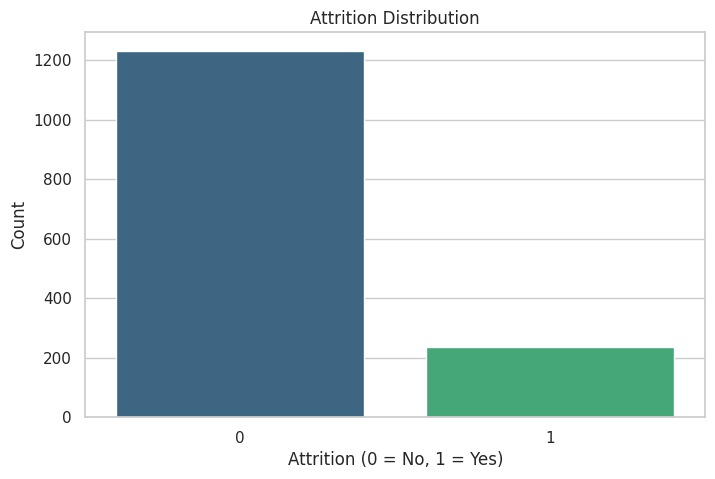

In [ ]:

# Attrition Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='attrition', hue=None, palette='viridis', legend=False)
plt.title("Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## **2. Age vs. Attrition**

Description: This boxplot compares the age distribution of employees who left the company versus those who stayed.

Insight: It helps determine if certain age groups are more likely to leave the organization, potentially identifying trends like younger employees leaving more often.

Average age of employees who stayed: 37.56 years

Average age of employees who left: 33.61 years

**Conclusion**: - Younger employees tend to leave more often.

<ipython-input-320-f9408188cd58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='age', palette='muted')


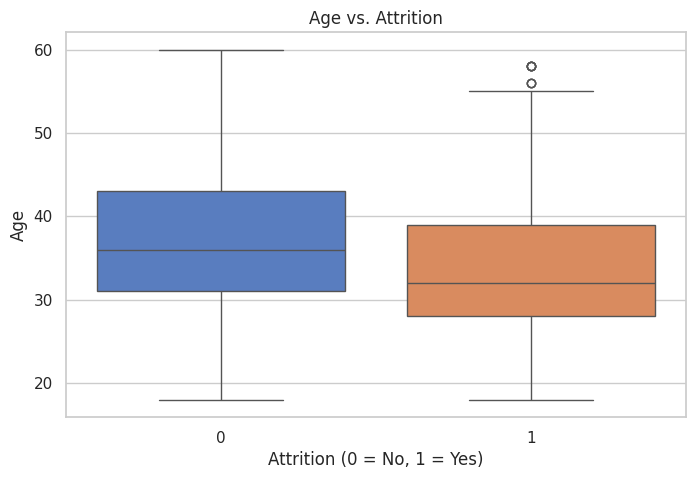

In [ ]:
# Age vs. Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='attrition', y='age', palette='muted')
plt.title("Age vs. Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

## **3. Department vs. Attrition (Percentage of Attrition in Each Department)**

Description: This bar chart shows the number of employees who stayed and left in each department.

Insight: It helps identify departments with higher attrition rates, indicating where organizational improvements may be needed.

**Human Resources:**
Stayed: 80.95%

Left: 19.05%

**Research & Development:**

Stayed: 86.16%

Left: 13.84%

**Sales:**

Stayed: 79.37%

Left: 20.63%

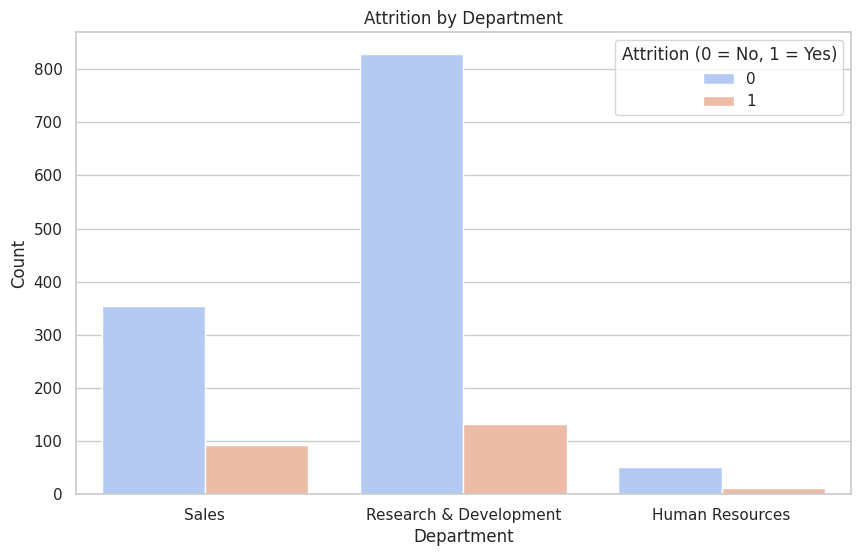

In [ ]:
# Department vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', hue='attrition', palette='coolwarm')
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()

## **4. Monthly Income vs. Attrition**

Description: This boxplot compares the monthly income of employees who left versus those who stayed.

Insight: It highlights if income levels influence attrition. For example, lower-paid employees may have higher attrition rates

**Monthly Income vs. Attrition**

Average monthly income of employees who stayed: $6,832.74

Average monthly income of employees who left: $4,787.09

Conclusion: Employees with lower income are more likely to leave.

<ipython-input-322-0f05f0b48570>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='coolwarm')


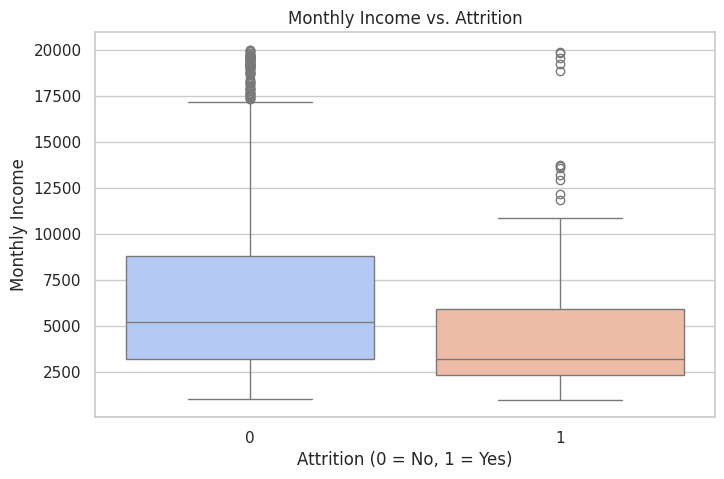

In [ ]:
# MonthlyIncome vs. Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='coolwarm')
plt.title("Monthly Income vs. Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()


## **5. Average Age by Job Role and Attrition**

### **Insights from the Bar Chart**

**General Observation:**

Employees who leave (Attrition = 1) are generally younger compared to those who stay (Attrition = 0), across most job roles.

**Job Roles with High Attrition Among Younger Employees:**

Sales Executive and Research Scientist roles show a noticeable difference, with younger employees (early 30s and below) more likely to leave.

This could indicate dissatisfaction with career growth opportunities or job conditions for younger employees in these roles.

**Job Roles with Stable Employee Retention:**

Manager and Healthcare Representative roles have relatively fewer younger employees leaving.

These roles might offer better stability, growth opportunities, or satisfaction for younger and older employees alike.

**Roles with Minimal Age Differences:**

Laboratory Technician and Human Resources roles show smaller differences in the average age of employees staying versus leaving. This suggests that attrition in these roles is less age-specific and might be influenced by other factors.


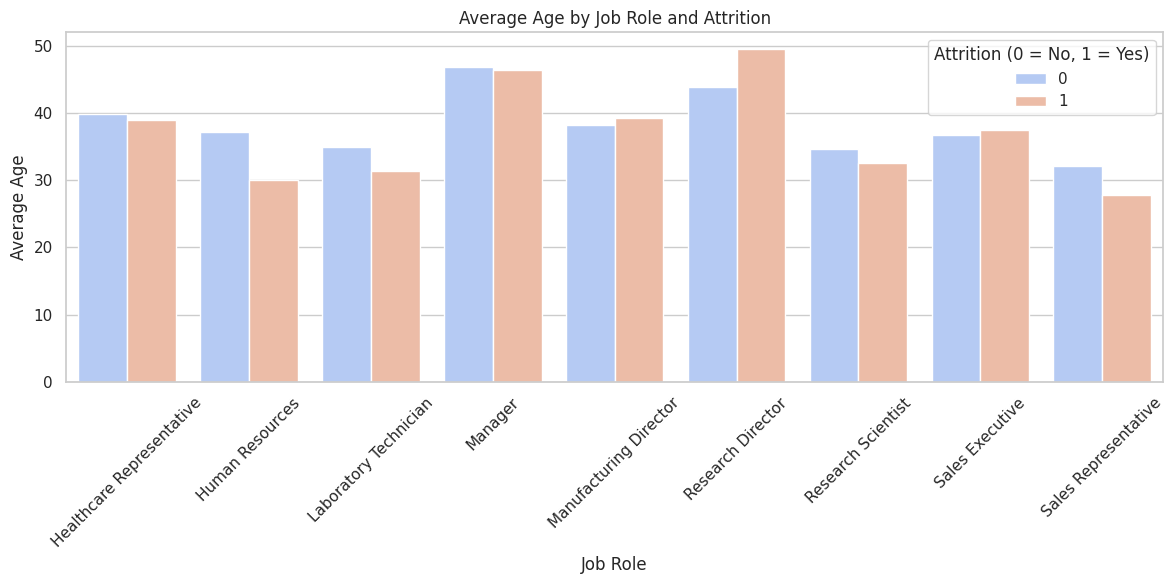

In [ ]:
# Calculate average age for each job role by attrition
avg_age_by_role_attrition = df.groupby(['jobrole', 'attrition'])['age'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_age_by_role_attrition, x='jobrole', y='age', hue='attrition', palette='coolwarm')
plt.title("Average Age by Job Role and Attrition")
plt.xlabel("Job Role")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()


## **6. Monthly Income vs. Overtime by Attrition**
General Salary Trends:

Employees who do not work overtime tend to have a more evenly distributed monthly income across both attrition groups.
Employees working overtime show more variability in income, with some earning significantly less.

**Attrition and Overtime Patterns:**

Among employees working overtime, those leaving the company (Attrition = 1) generally have lower salaries compared to those staying (Attrition = 0).

Employees who do not work overtime and have higher salaries are less likely to leave, indicating salary satisfaction plays a role in retention.

**Impact of Overtime:**

Overtime seems to increase dissatisfaction in lower-income groups which lead to higher attrition rates.
High-income employees working overtime are less prone to leaving, suggesting that compensation offsets the potential dissatisfaction caused by additional work hours.

**Overall Observations:**

Low salary combined with overtime is a notable factor which affects attrition.
Companies may need to address the workload and compensation balance to improve employee retention, particularly for overtime workers.

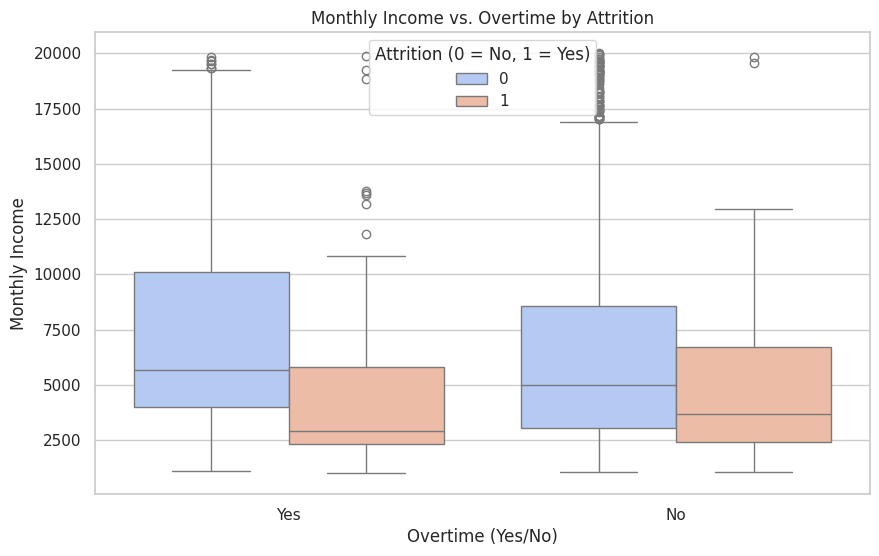

In [ ]:
# Boxplot for Overtime vs Salary grouped by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='overtime', y='monthlyincome', hue='attrition', palette='coolwarm')
plt.title("Monthly Income vs. Overtime by Attrition")
plt.xlabel("Overtime (Yes/No)")
plt.ylabel("Monthly Income")
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()


#Preporcessing the datas

In [ ]:
print(df['attrition'].head())

0    1
1    0
2    1
3    0
4    0
Name: attrition, dtype: int64


In [ ]:
# Split the dataset into features and target
X = df.drop('attrition', axis=1)  # Features
y = df['attrition']  # Target


In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#logistic Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# Predicting the  probabilities
y_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       247
           1       0.34      0.64      0.44        47

    accuracy                           0.74       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.74      0.77       294

Confusion Matrix:
 [[188  59]
 [ 17  30]]
ROC AUC Score: 0.7771556550951848


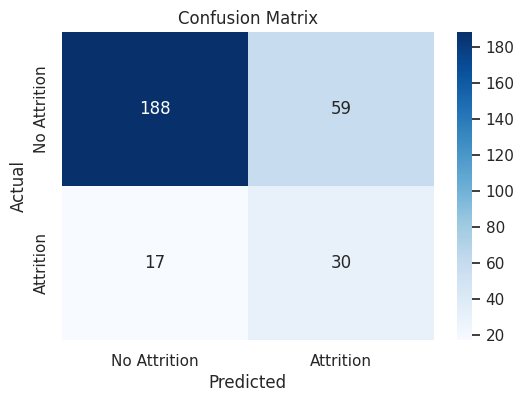

In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


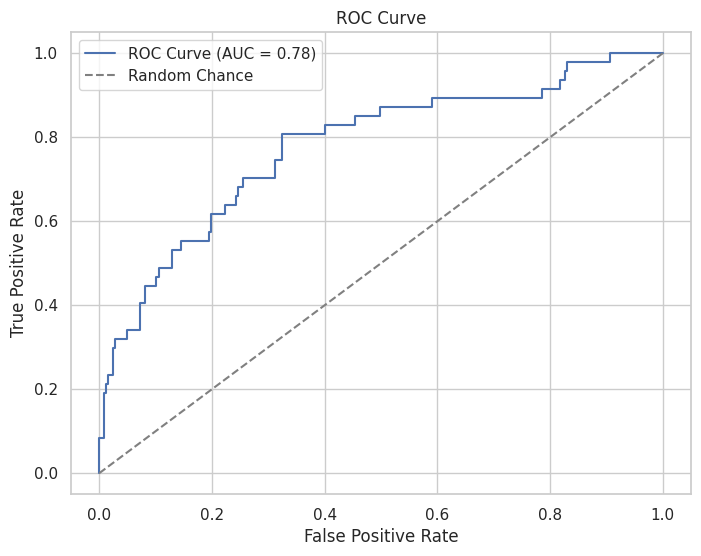

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Random Forest



In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
# Print results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)
print("Random Forest Confusion Matrix:\n", confusion_mat_rf)

Random Forest Accuracy: 0.8435374149659864
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.56      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.81      0.84      0.80       294

Random Forest Confusion Matrix:
 [[243   4]
 [ 42   5]]


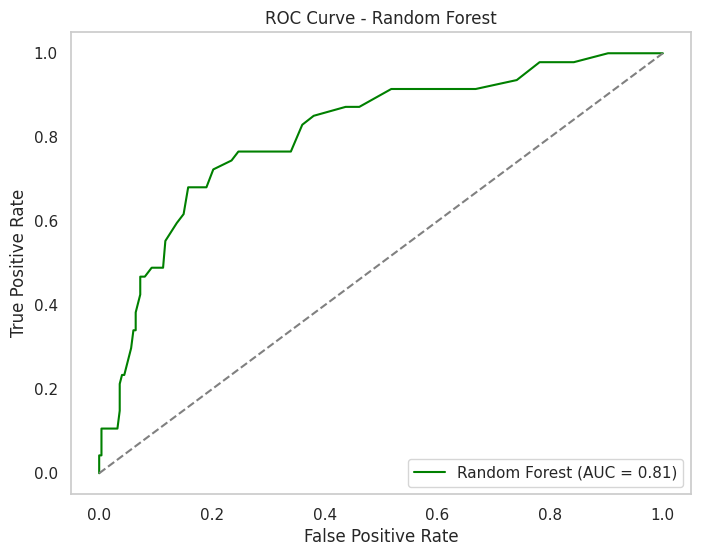

In [ ]:
# 1. ROC Curve for Random Forest
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

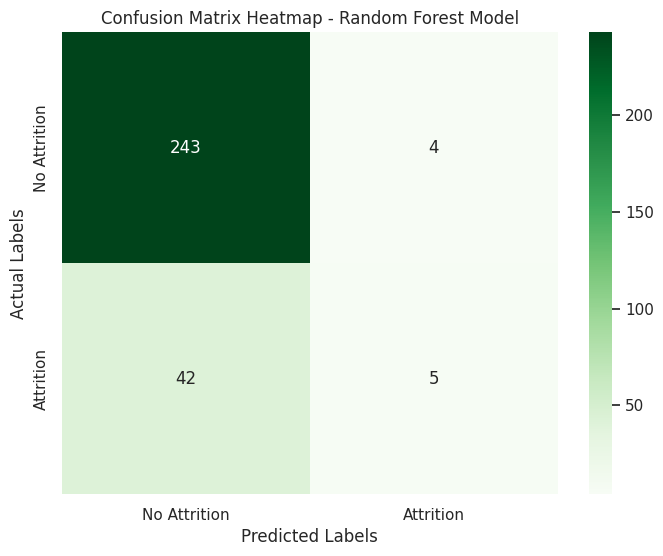

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Attrition", "Attrition"],
            yticklabels=["No Attrition", "Attrition"])
plt.title("Confusion Matrix Heatmap - Random Forest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# KNN (The k-nearest neighbors)

In [ ]:
# Lists to store results for different n_neighbors
neighbors = range(1, 21)
accuracies = []
roc_aucs = []


In [ ]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    # Store accuracy and ROC AUC score
    accuracies.append(accuracy_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_proba))


In [ ]:
# Final KNN with best k
best_k = neighbors[accuracies.index(max(accuracies))]
print(f"Best k (based on Accuracy): {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
y_proba_final = knn_final.predict_proba(X_test)[:, 1]
print("\nClassification Report for Best KNN:")
print(classification_report(y_test, y_pred_final))

Best k (based on Accuracy): 16

Classification Report for Best KNN:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.75      0.06      0.12        47

    accuracy                           0.85       294
   macro avg       0.80      0.53      0.52       294
weighted avg       0.83      0.85      0.79       294



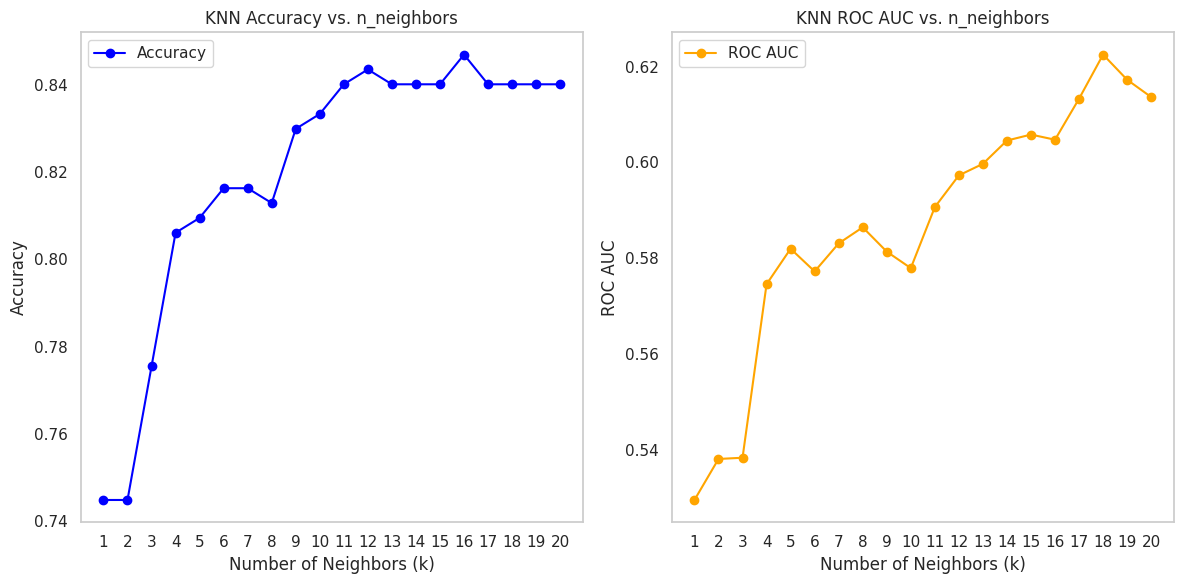

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(neighbors, accuracies, marker='o', label='Accuracy', color='blue')
plt.title('KNN Accuracy vs. n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.legend()

# AUC Plot
plt.subplot(1, 2, 2)
plt.plot(neighbors, roc_aucs, marker='o', label='ROC AUC', color='orange')
plt.title('KNN ROC AUC vs. n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC')
plt.xticks(neighbors)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


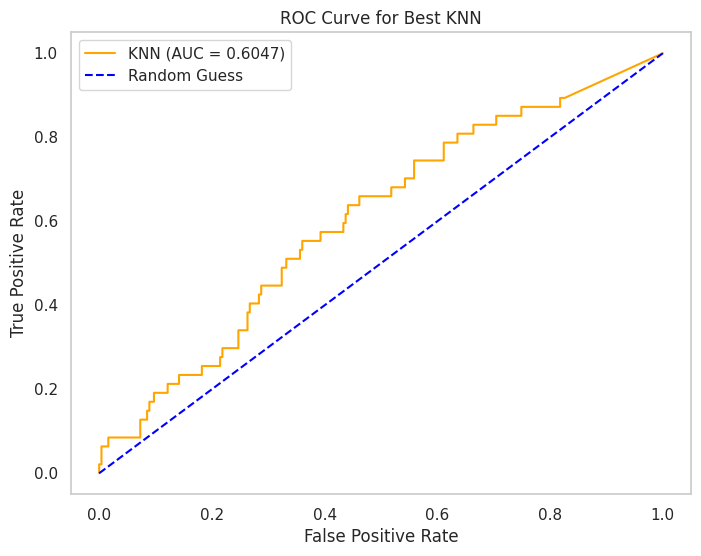

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f"KNN (AUC = {roc_auc_score(y_test, y_proba_final):.4f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Best KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


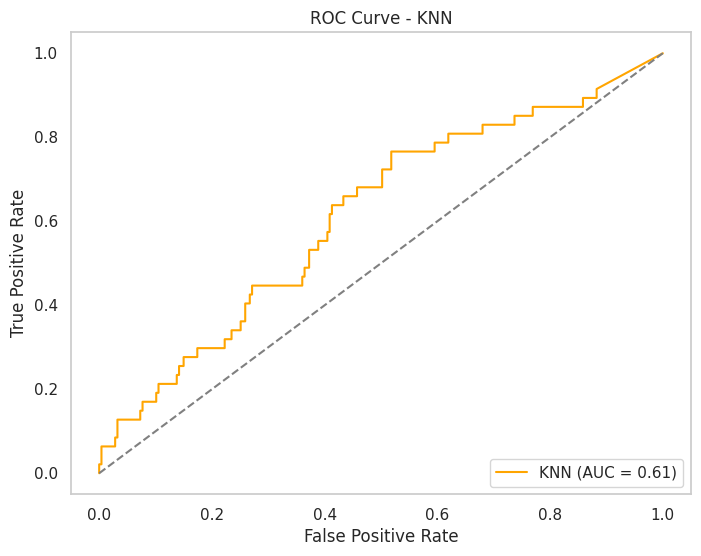

In [ ]:
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='orange', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


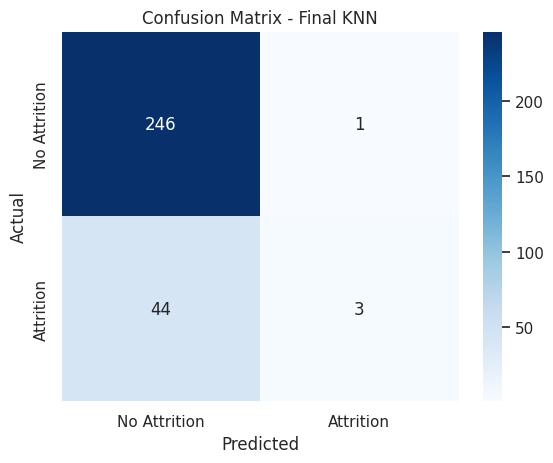

In [ ]:
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.title("Confusion Matrix - Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


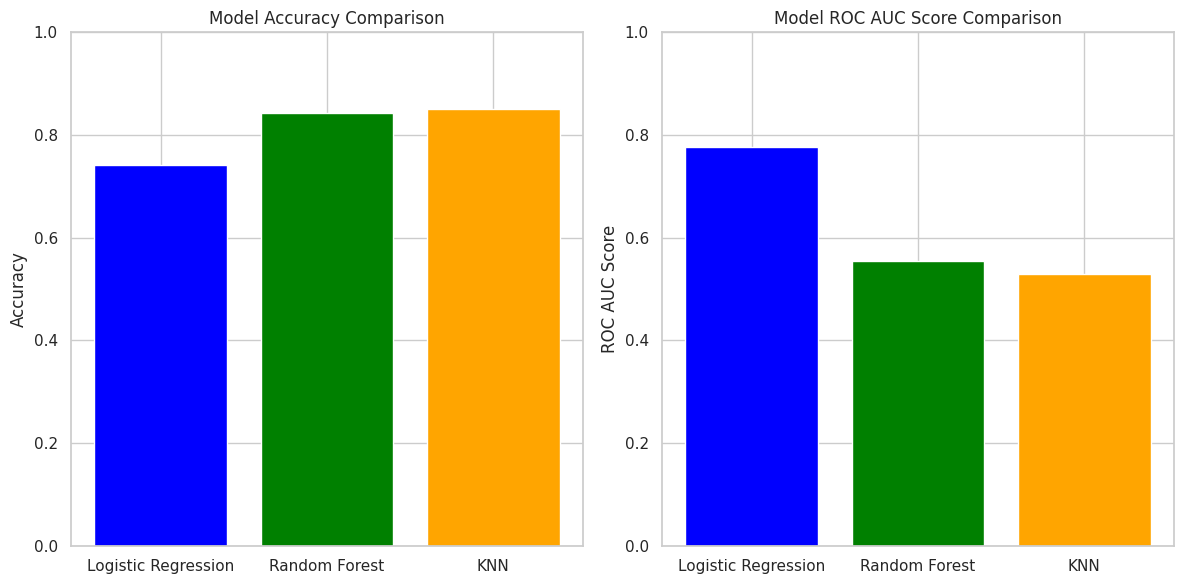

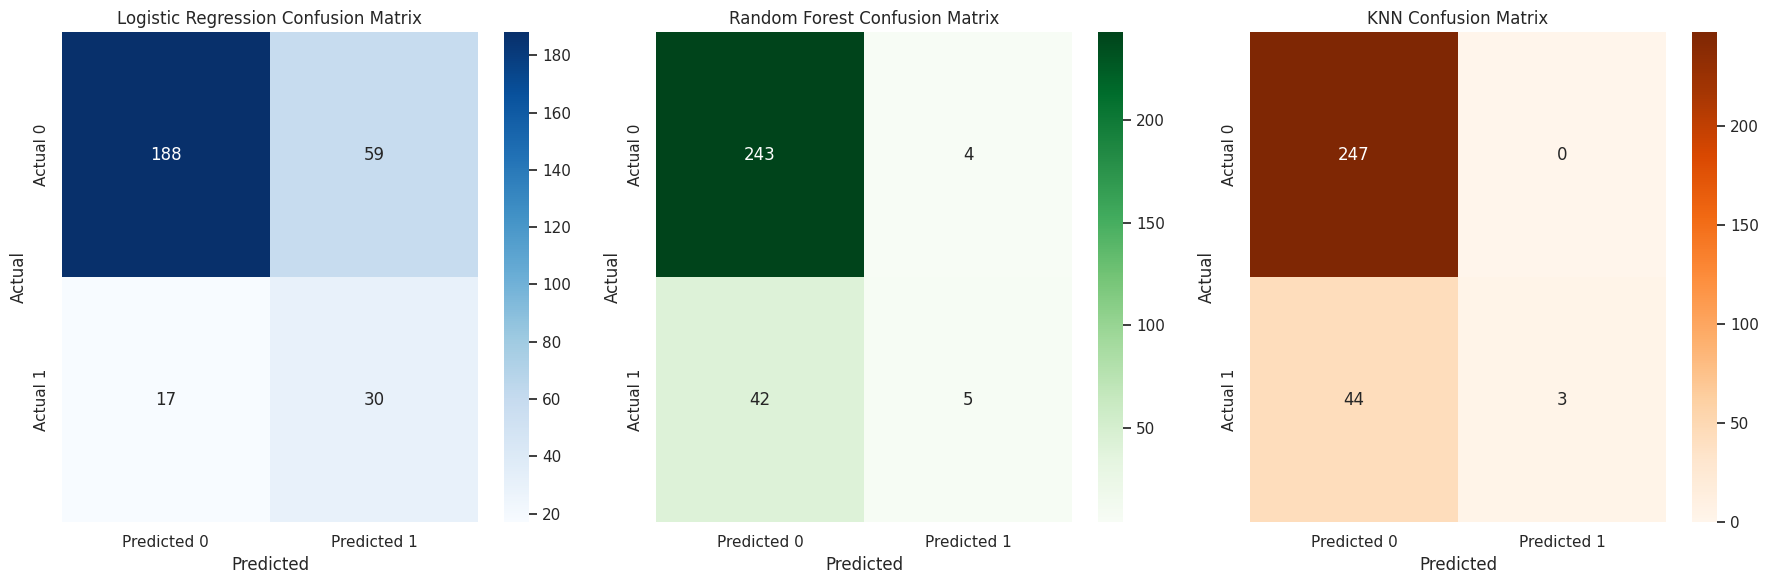

In [ ]:

# Logistic Regression Metrics
log_reg_accuracy = 0.7415
log_reg_roc_auc = 0.7772
log_reg_cm = np.array([[188, 59], [17, 30]])

# Random Forest Metrics
rf_accuracy = 0.8435
rf_roc_auc = 0.5549  # Macro avg ROC AUC from classification report
rf_cm = np.array([[243, 4], [42, 5]])

# KNN Metrics
knn_accuracy = 0.85
knn_roc_auc = 0.53  # Macro avg ROC AUC from classification report
knn_cm = np.array([[247, 0], [44, 3]])

# Initialize lists to store results for comparison
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [log_reg_accuracy, rf_accuracy, knn_accuracy]
roc_aucs = [log_reg_roc_auc, rf_roc_auc, knn_roc_auc]

# Plotting Comparison
plt.figure(figsize=(12, 6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# ROC AUC Comparison
plt.subplot(1, 2, 2)
plt.bar(models, roc_aucs, color=['blue', 'green', 'orange'])
plt.title('Model ROC AUC Score Comparison')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Confusion Matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

# KNN Confusion Matrix
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axs[2])
axs[2].set_title('KNN Confusion Matrix')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:

def preprocess_input(user_data, ref_data):
    """
    Preprocessing user-provided input to match the training data structure.
    """
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_data])
    input_df = pd.get_dummies(input_df, drop_first=True)

    # Add missing columns from training data
    missing_columns = set(ref_data.columns) - set(input_df.columns)
    for col in missing_columns:
        input_df[col] = 0

    # Ensure the same column order as the training data
    input_df = input_df[ref_data.columns]

    return input_df

def predict_user_attrition(user_data):
    """
    Predict attrition for user input data.
    """
    # Preprocess user data
    preprocessed_data = preprocess_input(user_data, X_train)

    # Make predictions with all models
    lr_pred = model.predict(preprocessed_data)[0]
    lr_prob = model.predict_proba(preprocessed_data)[0][1]

    rf_pred = rf_model.predict(preprocessed_data)[0]
    rf_prob = rf_model.predict_proba(preprocessed_data)[0][1]

    knn_pred = knn_final.predict(preprocessed_data)[0]
    knn_prob = knn_final.predict_proba(preprocessed_data)[0][1]

    # Print results
    print(f"Logistic Regression: Predicted = {'Yes' if lr_pred == 1 else 'No'} | Probability = {lr_prob:.2f}")
    print(f"Random Forest: Predicted = {'Yes' if rf_pred == 1 else 'No'} | Probability = {rf_prob:.2f}")
    print(f"KNN: Predicted = {'Yes' if knn_pred == 1 else 'No'} | Probability = {knn_prob:.2f}")

# Example user data
user_input = {
    'age': 35,
    'monthlyincome': 6000,
    'overtime': 'Yes',
    'department': 'Research & Development',
    'jobrole': 'Laboratory Technician',
    'yearsatsamelevel': 4,
    'gender': 'Male',
    'maritalstatus': 'Married',
    'education': 'Bachelor',
}

# Predict attrition for the user
predict_user_attrition(user_input)


Logistic Regression: Predicted = Yes | Probability = 0.57
Random Forest: Predicted = Yes | Probability = 0.57
KNN: Predicted = No | Probability = 0.00
